### Regression from scratch ###
1. Write a python code using only numpy to impement a solution of 

$$ \hat{\beta} = (X^TX)^{-1}X^Ty $$

2. compare with a simpler solution 

$$ \hat{\beta} = (X)^{-1}y $$

3. implement a python code, using only numpy that uses a gradient descent to find the solution of the linear regression coefficient $\beta$, using three different losses:

   * $L_2 = \frac{1}{N}\sum_{i=1}^N (y_i -f(x_i))^2 $

   * $L_1 = \frac{1}{N}\sum_{i=1}^N | y_i -f(x_i)| $

   * $L_{LC}= \frac{1}{N}\sum_{i=1}^N \ln [ \cosh (y_i -f(x_i)) ] $
   
    Remember for the gradient descent:
$$
\vec{\beta}(i+1) = \vec{\beta}(i) - \alpha\cdot \nabla_{\vec{\beta}}Loss(\vec{\beta}| Data) \\
$$
$\vec{\beta}$ is the vector of the coefficient (including the intercept)

4. start considering a one-dimensional dataset provided to generate some outliers. 
Compare the different losses using both training and test sets in different plots

In [1]:
%matplotlib inline

import numpy as np
def mk_data(minR=-5,maxR=5, step=0.5, sigma=1):
    a = -5.0
    b = 3.0
    x = np.arange(minR,maxR,0.1)
    y = b*x + a + np.random.normal(0,sigma, len(x))
    x = x + np.random.normal(0,sigma, len(x))
    return  x, y

def add_outliers(y,inc = 20.0):
    idx = np.argsort(y)
    y[idx[:2]] += inc
    y[idx[-2:]] -= inc
    return y
s = 0.5
XL, yL = mk_data(sigma=s) # training sets
yL = add_outliers(yL)
XT, yT = mk_data(minR=5,maxR=15, step=1, sigma=s)  # test sets


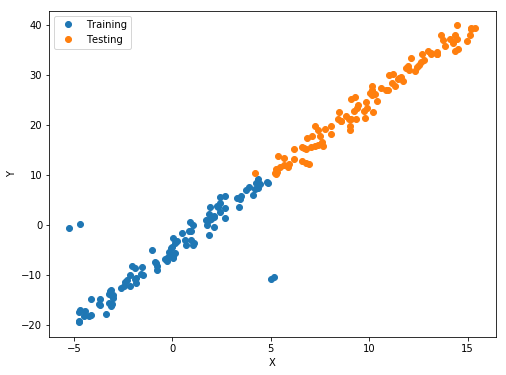

In [2]:
## plot the data##
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[8,6])
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(XL,yL,'o', label='Training')
plt.plot(XT,yT,'o', label='Testing')
plt.legend()


## Exercise 1
At first, I created and added to XL a vector of one of the same lenght of XL. XL1 is the new features vector with dimensions (100,2).
Then I computed the Penrose-Moore pseudoinverse and, at last, I calculated beta, the weights vector.


The linear regression outcome is y=[2.48290707]x+[-4.8224889]


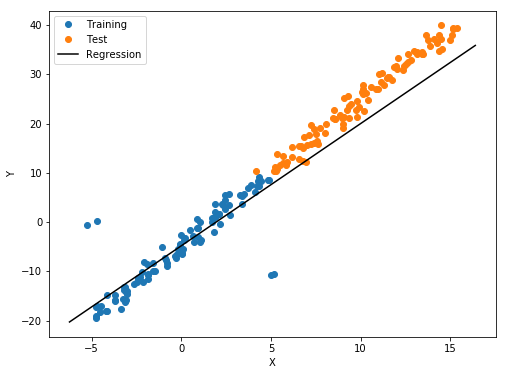

In [3]:
##  write the code ##
#Exercise 1

#penrose pseudo inverse is(XtX)-1Xt
n=len(XL)
#print(n)
#print(XL)
n=len(XL)
XL0=XL.reshape(n,1)
X0=np.ones(n)
X0=X0.reshape(n,1)
XL1= np.concatenate((X0,XL0), axis=1)
XLt=np.transpose(XL1)

#we prepare the test set for further analysis
XT0=XT.reshape(n,1)
X0=np.ones(n)
X0=X0.reshape(n,1)
XT1= np.concatenate((X0,XT0), axis=1)





#print(XLt.shape)

XtX=XLt.dot(XL1)
#print(XtX.shape)
XtX_1=np.linalg.inv(XtX)

yL=yL.reshape(n, 1)




X_cross=XtX_1.dot(XLt)
beta=X_cross.dot(yL)
print("The linear regression outcome is y=" + str(beta[1])+"x+"+ str(beta[0]))


fig = plt.figure(figsize=[8,6])
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(XL,yL,'o', label='Training')
plt.plot(XT,yT,'o', label='Test')
x = np.linspace(min(XL)-1,max(XT)+1)
plt.plot(x, x*beta[1]+beta[0],'k',label='Regression')
plt.legend()


## Exercise 2
I cannot compute the inverse because X is not a square matrix.


## Exercise 3
I approach exercise 3 defining 3 functions: iter1 for Loss1,iter2 for Loss2 and iter3 for LogCosh loss. Each function returns beta.





In [4]:
#Exercise 3
#function for Loss1
def iter1(x, y, tmax):
    n=len(y)
    theta1=np.ones(len(x.T)) #theta has dimension = number of features+ 1 (bias/intercept)
    theta1=theta1.reshape(2,1)
    theta2=np.zeros(len(x.T))
    theta2=theta2.reshape(2,1)
    tau=1
    #print(y.shape)
    #print(x.shape)
    while tau < tmax:
        
        theta1=theta2
        #I decided to put the learning rate alpha=1/tau because it is a tipical choice
        theta2=theta1-np.sign(x.T).dot(x.dot(theta1)-y)/(tau*n)
        tau += 1
        if np.array_equal(theta1, theta2) == True:
            print(tau)
            break

    return theta2

beta1=iter1(XL1, yL, 200)  
#print(beta1)  





In [5]:
#function for Loss2
def iter2(x, y, tmax):
    n=len(y)
    theta1=np.ones(len(x.T)) #theta has dimension = number of features+ 1 (bias/intercept)
    theta1=theta1.reshape(2,1)
    theta2=np.zeros(len(x.T))
    theta2=theta2.reshape(2,1)
    tau=1
    #print(y.shape)
    #print(x.shape)
    while tau < tmax:
        
        theta1=theta2
        #I decided to put the learning rate alpha=1/tau because it is a tipical choice
        theta2=theta1-(2/(tau*n))*(x.T).dot(x.dot(theta1)-y)
        #print(theta2)
        #print(theta1)
        tau += 1
        if (np.array_equal(theta1, theta2) == True):
            print(tau)
            break
    
    return theta2

beta2=iter2(XL1, yL, 200)

In [6]:
#function for Log cosh loss
def iter3(x, y, tmax):
    n=len(y)
    y=y.reshape(100,1)
    theta1=np.ones(len(x.T)) #theta has dimension = number of features+ 1 (bias/intercept)
    theta1=theta1.reshape(2,1)
    theta2=np.zeros(len(x.T))
    theta2=theta2.reshape(2,1)
    tau=1
    #print(y.shape)
    #print(x.shape)
    while tau < tmax:
        
        theta1=theta2
        #I decided to put the learning rate alpha=1/tau because it is a tipical choice
        theta2=theta1-(2/(tau*n))*np.dot(x.T,np.tanh(x.dot(theta1)-y))
        
        #print(x.dot(theta1)-y)
        tau += 1
        if (np.array_equal(theta1, theta2) == True):
            print(tau)
            break
    
    return theta2

beta3=iter3(XL1, yL, 200)
#print(beta3)

L1 regression outcome is y=[2.68247472]x+[-4.79317238]
L2 regression outcome is y=[2.48290706]x+[-4.82248964]
L3 regression outcome is y=[2.9278657]x+[-4.69195962]


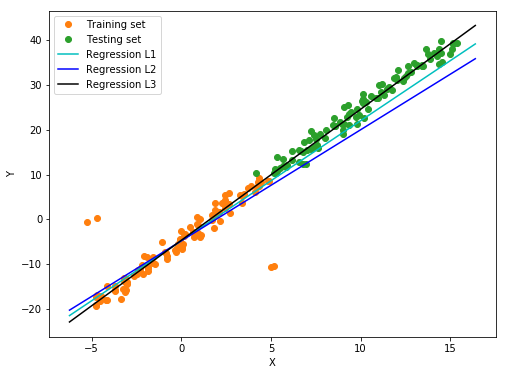

In [7]:
n=len(XL1)
#print(beta1)
#print(beta2)
fig = plt.figure(figsize=[8,6])
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(XL,yL,'oC1', label='Training set')
plt.plot(XT,yT,'oC2', label='Testing set')
x = np.linspace(min(XL)-1,max(XT)+1)
plt.plot(x, x*beta1[1]+beta1[0],'c',label='Regression L1')
plt.plot(x, x*beta2[1]+beta2[0],'b',label='Regression L2')
plt.plot(x, x*beta3[1]+beta3[0],'k',label='Regression L3')
plt.legend()

print("L1 regression outcome is y=" + str(beta1[1])+"x+"+ str(beta1[0]))
print("L2 regression outcome is y=" + str(beta2[1])+"x+"+ str(beta2[0]))
print("L3 regression outcome is y=" + str(beta3[1])+"x+"+ str(beta3[0]))



## Exercise 4
In order to understand which one of these regression represent better the dataset, we are going through two paths: a graphic one (1) in which we compare plots and a quantitative one (2) in which we estimate errors.
1. At first, we can observe that solution of exercise 1 (computed using pseudo-inverse matrix) and L2 regression are very similar, in according with the theory. Therefore I decided to show only L2 regression in the graphs, omitting the other one. Above this paragraph, a graph summerizes the results of all three algorithms. Now, we want to highlight regressions behavior for training and test set. To do that, we compare two to two methods and for each couple we plot a graph for training dataset and one for test dataset.




L2 regression outcome is y=[2.48290706]x+[-4.82248964]
The linear regression outcome is y=[2.48290707]x+[-4.8224889]


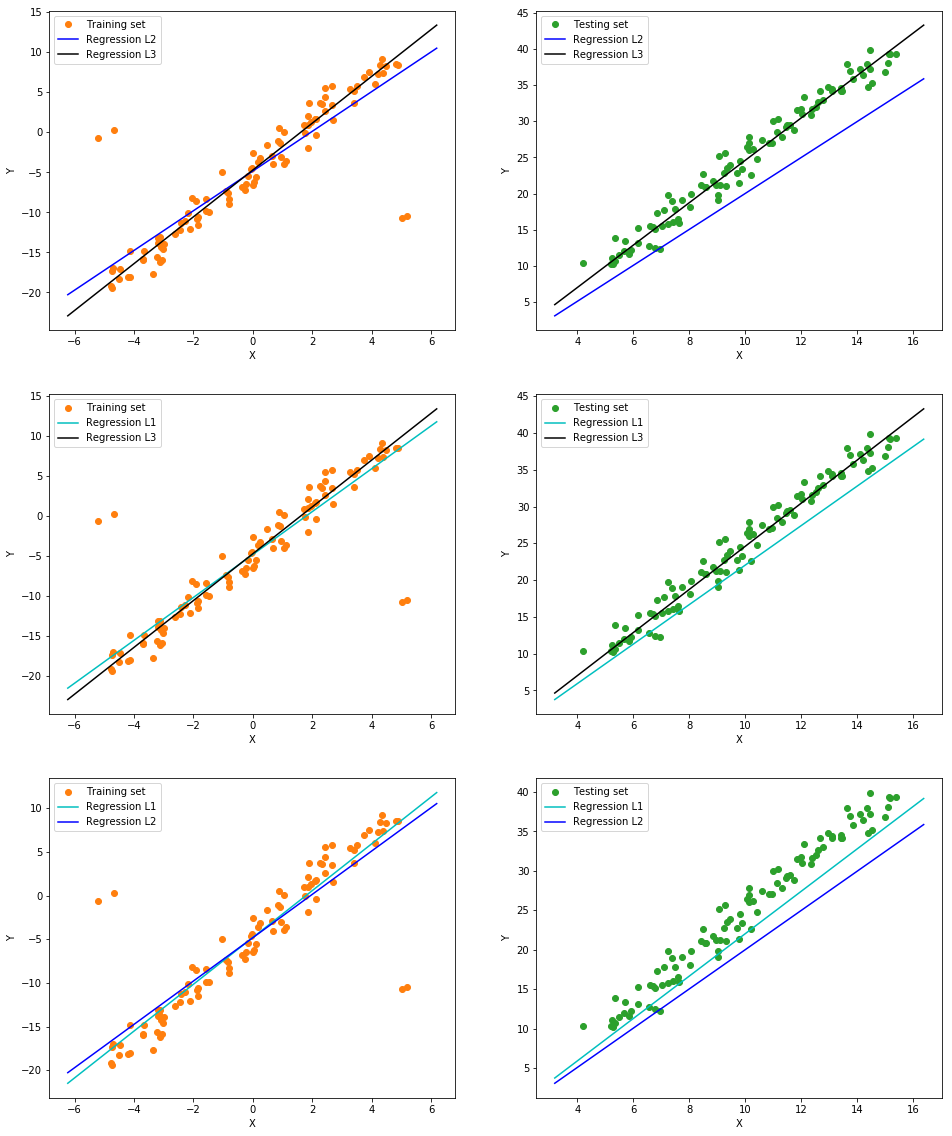

In [8]:
print("L2 regression outcome is y=" + str(beta2[1])+"x+"+ str(beta2[0]))
print("The linear regression outcome is y=" + str(beta[1])+"x+"+ str(beta[0]))

#first row
fig = plt.figure(figsize=[16,20]) #training
plt.subplot(321)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(XL,yL,'oC1', label='Training set')
#plt.plot(XT,yT,'oC2', label='Testing')
x = np.linspace(min(XL)-1,max(XL)+1)
#plt.plot(x, x*beta1[1]+beta1[0],'c',label='Regression L1')
plt.plot(x, x*beta2[1]+beta2[0],'b',label='Regression L2')
plt.plot(x, x*beta3[1]+beta3[0],'k',label='Regression L3')
plt.legend()

plt.subplot(322) #test
plt.xlabel('X')
plt.ylabel('Y')
#plt.plot(XL,yL,'oC1', label='Training')
plt.plot(XT,yT,'oC2', label='Testing set')
x = np.linspace(min(XT)-1,max(XT)+1)
#plt.plot(x, x*beta1[1]+beta1[0],'c',label='Regression L1')
plt.plot(x, x*beta2[1]+beta2[0],'b',label='Regression L2')
plt.plot(x, x*beta3[1]+beta3[0],'k',label='Regression L3')
plt.legend()

#second row
plt.subplot(323) #training
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(XL,yL,'oC1', label='Training set')
#plt.plot(XT,yT,'oC2', label='Testing set')
x = np.linspace(min(XL)-1,max(XL)+1)
plt.plot(x, x*beta1[1]+beta1[0],'c',label='Regression L1')
#plt.plot(x, x*beta2[1]+beta2[0],'b',label='Regression L2')
plt.plot(x, x*beta3[1]+beta3[0],'k',label='Regression L3')
plt.legend()

plt.subplot(324) #test
plt.xlabel('X')
plt.ylabel('Y')
#plt.plot(XL,yL,'oC1', label='Training')
plt.plot(XT,yT,'oC2', label='Testing set')
x = np.linspace(min(XT)-1,max(XT)+1)
plt.plot(x, x*beta1[1]+beta1[0],'c',label='Regression L1')
#plt.plot(x, x*beta2[1]+beta2[0],'b',label='Regression L2')
plt.plot(x, x*beta3[1]+beta3[0],'k',label='Regression L3')
plt.legend()


#third row
plt.subplot(325)#train
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(XL,yL,'oC1', label='Training set')
#plt.plot(XT,yT,'oC2', label='Testing set set')
x = np.linspace(min(XL)-1,max(XL)+1)
plt.plot(x, x*beta1[1]+beta1[0],'c',label='Regression L1')
plt.plot(x, x*beta2[1]+beta2[0],'b',label='Regression L2')
#plt.plot(x, x*beta3[1]+beta3[0],'k',label='Regression L3')
plt.legend()

plt.subplot(326)#test
plt.xlabel('X')
plt.ylabel('Y')
#plt.plot(XL,yL,'oC1', label='Training set')
plt.plot(XT,yT,'oC2', label='Testing set')
x = np.linspace(min(XT)-1,max(XT)+1)
plt.plot(x, x*beta1[1]+beta1[0],'c',label='Regression L1')
plt.plot(x, x*beta2[1]+beta2[0],'b',label='Regression L2')
#plt.plot(x, x*beta3[1]+beta3[0],'k',label='Regression L3')
plt.legend()





2. This time we compute errors in different ways. We define 3 functions for the three losses. Then we compute them both for training and test set. This quantitative methods confirms the intuition the plots gave us, e.g. that the coshLog loss function generalizes better. 



In [19]:
#quantitave estimation of the performance
#we estimate the error using loss funcions
def loss1err(x,y, theta):
    Tot=np.abs(x.dot(theta)-y)
    
    return Tot.sum()/len(y)

def loss2err(x,y, theta):
    Tot=np.dot((x.dot(theta)-y).T,(x.dot(theta)-y))
    
    return Tot[0,0]/len(y)

def loss3err(x,y, theta):
    Tot=np.log(np.cosh(x.dot(theta)-y))
    
    return Tot.sum()/len(y)

yT=yT.reshape(100,1)

print("Loss1 Training set")
print(loss1err(XL1,yL, beta1))
print(loss1err(XL1,yL, beta2))
print(loss1err(XL1,yL, beta3))
print("Loss1 Test set")
print(loss1err(XT1,yT, beta1))
print(loss1err(XT1,yT, beta2))
print(loss1err(XT1,yT, beta3))
print("\n")
print("Loss2 Training set")
print(loss2err(XL1,yL, beta1))
print(loss2err(XL1,yL, beta2))
print(loss2err(XL1,yL, beta3))
print("Loss2 Test set")
print(loss2err(XT1,yT, beta1))
print(loss2err(XT1,yT, beta2))
print(loss2err(XT1,yT, beta3))
print("\n")
print("Loss3 Training set")
print(loss3err(XL1,yL, beta1))
print(loss3err(XL1,yL, beta2))
print(loss3err(XL1,yL, beta3))
print("Loss3 Test set")
print(loss3err(XT1,yT, beta1))
print(loss3err(XT1,yT, beta2))
print(loss3err(XT1,yT, beta3))

Loss1 Training set
1.9942530321688738
2.2753997970710342
1.8501582340323615
Loss1 Test set
2.8577742837522777
4.822992821823392
1.175344549567719


Loss2 Training set
16.35174461990221
16.02466903414213
17.65486548894894
Loss2 Test set
10.347091923074185
26.797590199752737
2.241403511220563


Loss3 Training set
1.4605576074658706
1.6904763111982952
1.3516433971170334
Loss3 Test set
2.2197272498171423
4.142325105008138
0.6937609360054162
